# Lending Club Loan Data Analysis

#### DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

#### Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

#### Domain: Finance

__Analysis to be done:___ Perform data preprocessing and build a deep learning prediction model. 

#### Dataset columns and definition:

 
- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

- installment: The monthly installments owed by the borrower if the loan is funded.

- log.annual.inc: The natural log of the self-reported annual income of the borrower.

- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

- fico: The FICO credit score of the borrower.

- days.with.cr.line: The number of days the borrower has had a credit line.

- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

#### Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

#### Tasks:

1. __Feature Transformation__

 - Transform categorical values into numerical values (discrete)

2. __Exploratory data analysis of different factors of the dataset.__

3. __Additional Feature Engineering__

 - You will check the correlation between features and will drop those features which have a strong correlation. This will help reduce the number of features and will leave you with the most relevant features

4. __Modeling__

 - After applying EDA and feature engineering, you are now ready to build the predictive models

 - In this part, you will create a deep learning model using Keras with Tensorflow backend

__Setting up the Environment__

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.


In [2]:
print("Numpy: ",np.__version__)
print("Pandas: ",pd.__version__)
print("TensorFlow: ",tf.__version__)
print("Keras: ",keras.__version__)
print("Seaborn: ",sns.__version__)

Numpy:  1.18.1
Pandas:  1.0.3
TensorFlow:  2.1.0
Keras:  2.3.1
Seaborn:  0.10.1


#### Reading the dataset

In [3]:
data = pd.read_csv("loan_data.csv")
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Describing the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


___Finding imbalance in the dataset___

In [5]:
imbalance = pd.DataFrame(data['not.fully.paid'].value_counts())
imbalance['repr'] = imbalance['not.fully.paid'] / np.sum(imbalance['not.fully.paid']) * 100
imbalance

,not.fully.paid,repr
0,8045,83.994571
1,1533,16.005429


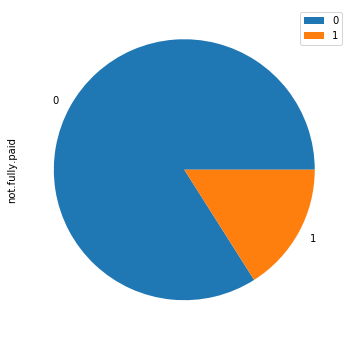

In [6]:
imbalance.plot(kind='pie',y='not.fully.paid',figsize=(10,6))
plt.show()

_From the above graph, it is evident that the dataset is highly imbalanced as class 0 represents 84% of the sample space._

#### Feature Transformation - Transform categorical values into numerical values (discrete)

In [7]:
data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['purpose'])
le.transform(data['purpose'])
le.classes_

data['purpose'] = le.fit_transform(data['purpose'])

In [9]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


__Exploratory Data Analysis__

#### Outliar Analysis

In [10]:
data.describe()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,1.944038,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,1.686881,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [11]:
outliar_cols = ['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec']

#### Discover outliers with mathematical function Z-Score
- The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

In [12]:
from scipy import stats

In [13]:
z = np.abs(stats.zscore(data[outliar_cols]))
print(z)

[[0.13931753 2.46309947 0.68038804 ... 0.71698894 0.29973008 0.23700318]
 [0.57886837 0.43885443 0.2440308  ... 0.71698894 0.29973008 0.23700318]
 [0.48648368 0.23070836 0.90865897 ... 0.26247044 0.29973008 0.23700318]
 ...
 [0.57886837 1.06867038 0.54569448 ... 2.91915909 0.29973008 0.23700318]
 [1.39166043 0.1569135  0.18272998 ... 1.55560358 0.29973008 0.23700318]
 [0.61685894 2.58060136 0.54059439 ... 2.01012208 0.29973008 0.23700318]]


In [14]:
threshold = 3
print(np.where(z > 3))

(array([   6,   10,   24, ..., 9568, 9571, 9573], dtype=int64), array([10, 10, 10, ..., 10, 10,  6], dtype=int64))


In [15]:
data = data[(z < 3).all(axis=1)]
data.shape

(8282, 14)

#### Feature Selection

___Filter Method___

> Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable MEDV. We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.

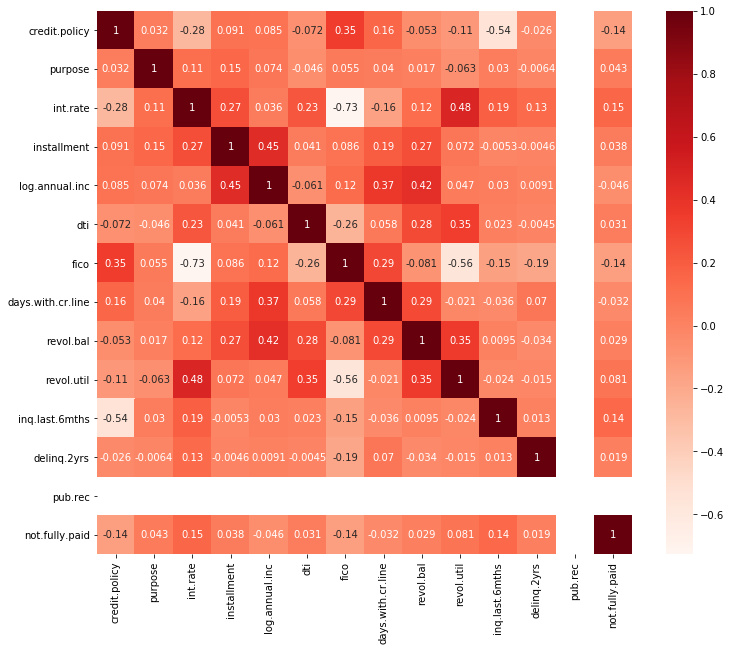

In [17]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
#Correlation with output variable
cor_target = abs(cor["not.fully.paid"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

not.fully.paid    1.0
Name: not.fully.paid, dtype: float64

___Identifying the X and y variables___

In [19]:
X = data.drop(columns=['not.fully.paid'])
y = data['not.fully.paid']
(X.shape,y.shape)

((8282, 13), (8282,))

In [20]:
X.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],
      dtype='object')

__Splitting the dataset in Training and Test set in 75:25 ratio__

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train Shape: {}".format(X_train.shape))
print("X_test Shape: {}".format(X_test.shape))
print("y_train Shape: {}".format(y_train.shape))
print("y_test Shape: {}".format(y_test.shape))

X_train Shape: (6211, 13)
X_test Shape: (2071, 13)
y_train Shape: (6211,)
y_test Shape: (2071,)


___Normalizing the Training set and Test set using Standard Scaler___

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Modeling using Keras

  - Input Dimension - 13
  - Hidden Layers - 8
  - Activation Function - Sigmoid (for binary classification)
  - Optimiser Function - Adam
  - Loss Function - Binary Cross Entropy

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

classifier = Sequential();

classifier.add(Dense(8, input_dim=13, activation='relu'))

classifier.add(Dense(13, activation='relu'))

classifier.add(Dense(1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier.fit(X_train, y_train, batch_size=10, epochs=100)

scores = classifier.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

Epoch 1/100
6211/6211 [==============================] - 1s 219us/step - loss: 0.4657 - accuracy: 0.8198
Epoch 2/100
6211/6211 [==============================] - 0s 63us/step - loss: 0.4160 - accuracy: 0.8485
Epoch 3/100
6211/6211 [==============================] - 0s 64us/step - loss: 0.4109 - accuracy: 0.8485
Epoch 4/100
6211/6211 [==============================] - 0s 63us/step - loss: 0.4079 - accuracy: 0.8485
Epoch 5/100
6211/6211 [==============================] - 0s 65us/step - loss: 0.4064 - accuracy: 0.8485
Epoch 6/100
6211/6211 [==============================] - 0s 63us/step - loss: 0.4050 - accuracy: 0.8485
Epoch 7/100
6211/6211 [==============================] - 0s 66us/step - loss: 0.4046 - accuracy: 0.8485
Epoch 8/100
6211/6211 [==============================] - 0s 62us/step - loss: 0.4036 - accuracy: 0.8485
Epoch 9/100
6211/6211 [==============================] - 0s 62us/step - loss: 0.4027 - accuracy: 0.8485
Epoch 10/100
6211/6211 [==============================] - 0s 61

6211/6211 [==============================] - 0s 62us/step - loss: 0.3847 - accuracy: 0.8487
Epoch 80/100
6211/6211 [==============================] - 0s 63us/step - loss: 0.3849 - accuracy: 0.8490
Epoch 81/100
6211/6211 [==============================] - 0s 62us/step - loss: 0.3846 - accuracy: 0.8488
Epoch 82/100
6211/6211 [==============================] - 0s 62us/step - loss: 0.3849 - accuracy: 0.8487
Epoch 83/100
6211/6211 [==============================] - 0s 61us/step - loss: 0.3846 - accuracy: 0.8491
Epoch 84/100
6211/6211 [==============================] - 0s 62us/step - loss: 0.3842 - accuracy: 0.8491
Epoch 85/100
6211/6211 [==============================] - 0s 63us/step - loss: 0.3844 - accuracy: 0.8488
Epoch 86/100
6211/6211 [==============================] - 0s 61us/step - loss: 0.3848 - accuracy: 0.8488
Epoch 87/100
6211/6211 [==============================] - 0s 61us/step - loss: 0.3844 - accuracy: 0.8491
Epoch 88/100
6211/6211 [==============================] - 0s 61us/st